In [121]:
import numpy as np
import matplotlib.pyplot as plt #画图的

%matplotlib inline

r = np.random.randn(200)*0.8
x1 = np.linspace(-3,1,200)
x2 = np.linspace(-1,3,200)
y1 = x1*x1 + 2*x1 -2 + r
y2 = -x2*x2 + 2*x2 +2 + r

X = np.hstack(([x1,y1],[x2,y2]))
Y = np.hstack((np.zeros((1,200)),np.ones((1,200))))
print(Y)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

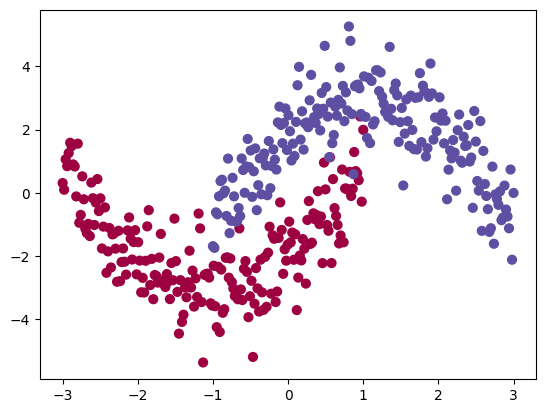

In [122]:
plt.scatter(X[0,:],X[1,:],c=Y,s = 40,cmap=plt.cm.Spectral)

定义神经网络的输入层、隐藏层、输出层
其中：输入层有两个，隐藏层我们设置3个，输出层有一个
输入层为前面的（x,y）坐标；隐藏层未知，我们等会设置；输出层为0和1，前两百个为0，后两百个为1
因为我们现在只有点，所以大致0所占的全部区域 和 1所占的全部区域并不知晓，只知道点的地方，所以我们要进行学习
学以一个模型，输入一个坐标就知道它属于红色还是蓝色

In [123]:
m = X.shape[1]      #样本个数

n_x = X.shape[0]    #输入层神经元个数 400个
x = X.shape[1]
n_h = 4             #隐藏层神经元个数
n_y = Y.shape[0]    #输出层神经元个数 400个
y = Y.shape[1]
print('n_x:',n_x,'  n_y:',n_y)
print('x:',x,'  y:',y)

n_x: 2   n_y: 1
x: 400   y: 400


In [124]:
'''进行网络参数 w 和 b 的初始化
此处一共只有一个隐藏层，该隐藏层有3个神经元
在进行输入层到隐藏层时，我们需要进行一次正向传播，需要给出一次w,b（此处为 w1,b1 ）
其中 w 矩阵种的 列一直由 输入层的神经元数 来表示，而 w 矩阵中的 行由隐藏层的行数和输出层的行数来决定，这是矩阵相乘的定义所决定的
'''
W1 = np.random.randn(n_h,n_x)*0.01
b1 = np.zeros((n_h,1))
W2 = np.random.randn(n_y,n_h)*0.01  
b2 = np.zeros((n_y,1))


In [125]:
'''assert判断数组维度是否正确，可以及时检查神经网络模型中参数的维度是否正确'''
assert(W1.shape == (n_h,n_x))
assert(b1.shape == (n_h,1))
assert(W2.shape == (n_y,n_h))
assert(b2.shape == (n_y,1))

parameters = {"W1":W1,"b1":b1,"W2":W2,"b2":b2}

正向传播过程
正向传播过程，包含了 $Z^{[1]}，A^{[1]}，Z^{[2]}，A^{[2]}$ 的计算，根据上一篇的详细推导结果：

$$Z^{[1]}=W^{[1]}X+b^{[1]}$$

$$A^{[1]}=g(Z^{[1]})$$

$$Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}$$

$$A^{[2]}=g(Z^{[2]})$$

其中，隐藏层的激活函数 $g(\cdot)$ 选择使用 tanh 函数，输出层的激活函数 $g(\cdot)$ 选择使用 sigmoid 函数。

In [126]:

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s
def forward_propagation(X,parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # assert(W1.shape == (n_h,n_x))
    # assert(b1.shape == (n_h,1))
    # assert(W2.shape == (n_y,n_h))
    # assert(b2.shape == (n_y,1))

    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1,X.shape[1]))

    cache = {"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2}

    return A2,cache

    

损失函数计算
$$J=-\frac{1}{m}\sum_{i=1}^my^{(i)}log\hat y^{(i)}+(1-y^{(i)})log(1-\hat
y^{(i)})$$

In [127]:
'''损失函数'''
def computer_loss(A2,Y,parameters):
    m = Y.shape[1]
    logprobs = np.multiply(Y,np.log(A2))+np.multiply((1-Y),np.log(1-A2))
    cost = -(1/m)*np.sum(logprobs)
    
    cost = np.squeeze(cost)

    return cost

反向传播
计算损失函数J中各个变量$A^{[2]}$，$Z^{[2]}$，$W^{[2]}$，$b^{[2]}$，$A^{[1]}$，$Z^{[1]}$，$W^{[1]}$，$b^{[1]}$ 
的偏导数。各个元素的偏导数推导结果：

$$dZ^{[2]}=A^{[2]}-Y$$

$$dW^{[2]}=\frac1mdZ^{[2]}A^{[1]T}$$

$$db^{[2]}=\frac1mnp.sum(dZ^{[2]},axis=1)$$

$$dZ^{[1]}=W^{[2]T}dZ^{[2]}\ast g'(Z^{[1]})$$

$$dW^{[1]}=\frac1mdZ^{[1]}X^T$$

$$db^{[1]}=\frac1mnp.sum(dZ^{[1]},axis=1)$$
定义函数：




In [128]:
def backward_propagation(parameters,cache,X,Y):
    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    #反向求导
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot( dZ2,A1.T)
    db2 = 1/m * np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = 1/m * np.dot(dZ1,X.T)
    db1 = 1/m * np.sum(dZ1,axis = 1,keepdims=True)

    #存储各个梯度
    grads = {"dW1":dW1,"db1":db1,"dW2":dW2,"db2":db2}
    return grads

下一步，我们根据上面的损失函数来更新 w 和 b

In [129]:
'''更新参数'''
def update_parameters(parameters,grads,learning_rate = 0.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    assert(W1.shape == (n_h,n_x))
    assert(b1.shape == (n_h,1))
    assert(W2.shape == (n_y,n_h))
    assert(b2.shape == (n_y,1))

    parameters = {"W1":W1,"b1":b1,"W2":W2,"b2":b2}

    return parameters

前面已经写好了 定义神经网络、预训练、计算损失函数、反向传播更新参数 w 和 b

接下来进行神经网络的搭建

In [130]:
def nn_model(X,Y,n_h = 4,num_iterations = 100000,print_cost = False):
    m = X.shape[1]
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01  
    b2 = np.zeros((n_y,1))

    parameters = {"W1":W1,"b1":b1,"W2":W2,"b2":b2}

    # 迭代训练
    J = [] #存储损失函数
    for i in range(0,num_iterations):
        A2,cache = forward_propagation(X,parameters)
        cost = computer_loss(A2,Y,parameters)
        grads = backward_propagation(parameters,cache,X,Y)
        parameters = update_parameters(parameters,grads)
        J.append(cost)
        # 每隔1000次训练，打印一次cost
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f"%(i,cost))

    return parameters        

In [131]:
parameters = nn_model(X,Y,n_h=4,num_iterations=100000,print_cost=True)

Cost after iteration 0: 0.693380
Cost after iteration 1000: 0.252149
Cost after iteration 2000: 0.250918
Cost after iteration 3000: 0.250395
Cost after iteration 4000: 0.250072
Cost after iteration 5000: 0.249808
Cost after iteration 6000: 0.249509
Cost after iteration 7000: 0.249078
Cost after iteration 8000: 0.248404
Cost after iteration 9000: 0.247467
Cost after iteration 10000: 0.092669
Cost after iteration 11000: 0.053940
Cost after iteration 12000: 0.045610
Cost after iteration 13000: 0.041352
Cost after iteration 14000: 0.038623
Cost after iteration 15000: 0.036679
Cost after iteration 16000: 0.035226
Cost after iteration 17000: 0.034101
Cost after iteration 18000: 0.033202
Cost after iteration 19000: 0.032462
Cost after iteration 20000: 0.031840
Cost after iteration 21000: 0.031305
Cost after iteration 22000: 0.030839
Cost after iteration 23000: 0.030427
Cost after iteration 24000: 0.030059
Cost after iteration 25000: 0.029728
Cost after iteration 26000: 0.029427
Cost after ite

In [132]:
def predict(parameters,X):
    A2,cache = forward_propagation(X,parameters)
    predictions = A2 > 0.5
    print("predictions: ",predictions)
    return predictions
predict(parameters,X)

predictions:  [[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False Fals

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [133]:
y_pred = predict(parameters,X)
accurary = np.mean(y_pred == Y) #比较y_pred 与 Y 的每一个值，如果相等就得到1，不相等就得到0，再把所有值加起来求均值，就可以求出有百分之多少相同
print(accurary)

predictions:  [[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False Fals

In [134]:
def plot_decision_boundary(model, X, y):

    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

predictions:  [[False False False ...  True  True  True]]


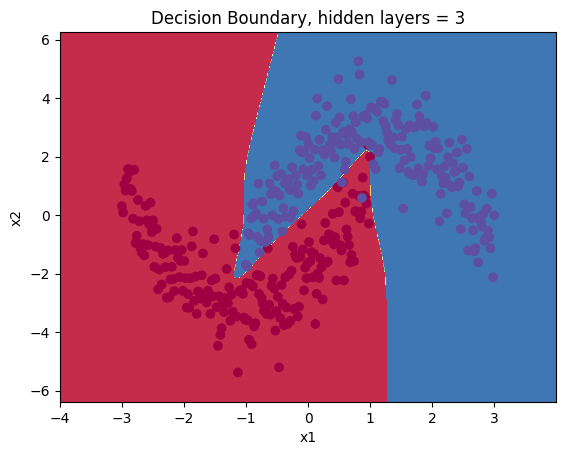

In [135]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary, hidden layers = 3")
plt.show()